<img src="https://camo.githubusercontent.com/1bef17f2d929b87e9acf45a40efb5c97030fa796/68747470733a2f2f7777772e6d6572636172692e636f6d2f6173736574732f696d672f68656c705f63656e7465722f75732f6f67702e706e67">

**Bussiness Problem:**


<br>**Marcani** is an online shopping marketplace which is powered by one of the biggest community of Japan where users can sell pretty much anything.The community wants to offer price suggestions to the sellers but is a tough task as the sellers are enabled to put just about anything, or any bundle of things, on mercani’s marketplace.</br>
<br>It can be hard to know how much something’s really worth. Small details can mean big differences in pricing. For example, one of these sweaters cost 335 dollars and the other cost 9.99 dollars. Can you guess which one’s which?</br>
<img src='https://storage.googleapis.com/kaggle-media/competitions/mercari/mercari_comparison.png' width=1200px height=200px>
<img src="https://smbomb.com/wp-content/uploads/2020/02/confusion.png" width=1200px height=350px>



**Problem Specification:**


*   The task of this case study is to build an algorithm that suggests the right product prices for shopping app from product name, user inputted text descriptions of the product, category name, brand name, item condition, and shipping information.
*   The challenge was about creating a model that would help sellers to price their products.Pricing should be intermediate between sellers and buyers.
*    The most challenging part was that this was a ​kernel-only​ competition, which  meant the training and inference of the model would be in a container environment  provided by Kaggle. The script had to finish within 60 minutes and consumed no  more than 16 GB of RAM. The test dataset was also quite large so that it couldn’t be  loaded into memory at once for inference, and batch inference was required. 




**Approaches:**


*   **Machine learning** is the fastest growing field in the world. 
*   Everyday there will be a launch of bunch of new algorithms. Some of them may work and some may not work on the data.
*   Their is no such ML algorithm that gives the super result then all the existing models. If it exists then all the models will be gone into dustbin.
*   Basing on the Prior Knowlege, domain excepts, from the problem statement and  even from the first price winners one chooses the algorithm to tackle their problem.
*   Let's try a bunch of regression models to apply on the dataset and we even try a ensemble MLP models on our data.

**References**

 https://www.youtube.com/watch?v=QFR0IHbzA30&t=2998s
 
 http://trap.ncirl.ie/3865/1/sanchitpereira.pdf 

 https://medium.com/unstructured/how-i-lost-a-silver-medal-in-kagglesmercari-price-suggestion-challenge-using-cnns-and-tensorflow-4013660fcded 



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en;q=0.9,en-GB;q=0.8,en-US;q=0.7,te;q=0.6,ru;q=0.5" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/test_stg2.tsv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585385694&Signature=dR4rseKUL7LJR%2BMw9e5H5h2BXwGE6b0%2FLLnbnErcQj9XI%2FJ954K50ZLfUWmSlQSW7rF0ifxC5dJuVHQK2GB2k50NUgMXUI6%2Fk4YCNj6y9P8iikWuEgCBsprDClcdKLq8iNtowRcFRwk6RFQQeFTaZpvN2t8DQYwFcrTQrLD2OaU9itX4Z5HNXSwo6myy36EXBAigT18Ey%2B145JgfAI0XYl%2FPyeeGYmUtP4zuP2c%2FWRZmhINr16mnCQOmaLTk%2BxAwWK2dTwrnCxKj6Gbd%2FSaQS%2BUsnrBheS3XTE52rJEwhpURk2DWhcwaUvLrWIz7abAdxIS27TiXYGKom4IcWjRj%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_stg2.tsv.zip" -O "test_stg2.tsv.zip" -c

--2020-03-25 08:55:21--  https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/test_stg2.tsv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585385694&Signature=dR4rseKUL7LJR%2BMw9e5H5h2BXwGE6b0%2FLLnbnErcQj9XI%2FJ954K50ZLfUWmSlQSW7rF0ifxC5dJuVHQK2GB2k50NUgMXUI6%2Fk4YCNj6y9P8iikWuEgCBsprDClcdKLq8iNtowRcFRwk6RFQQeFTaZpvN2t8DQYwFcrTQrLD2OaU9itX4Z5HNXSwo6myy36EXBAigT18Ey%2B145JgfAI0XYl%2FPyeeGYmUtP4zuP2c%2FWRZmhINr16mnCQOmaLTk%2BxAwWK2dTwrnCxKj6Gbd%2FSaQS%2BUsnrBheS3XTE52rJEwhpURk2DWhcwaUvLrWIz7abAdxIS27TiXYGKom4IcWjRj%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_stg2.tsv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308669128 (294M) [application/zip]
Saving to: ‘test_stg2.tsv.zip’

test_stg2.tsv.zip   100%[===========

In [0]:
!unzip '/content/test_stg2.tsv.zip'

Archive:  /content/test_stg2.tsv.zip
  inflating: test_stg2.tsv           


**Loading Dependencies:**

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import collections
from wordcloud import STOPWORDS
from scipy.sparse import csr_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
test2=pd.read_table('/content/test_stg2.tsv',sep='\t')
test2.to_csv('/content/mercari_test.csv',index=False)

In [0]:
del test2

**Loading Training Data**

In [0]:
train_data=pd.read_csv("/content/drive/My Drive/mercani_train.csv")
train_data.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


**Observations:**


*   We have 8 features in our dataset in which price is our target variable.
*   The target variable have a continious values which means It's a regression machine learning model.
     

    *   Train-id: id of the product (numerical)
    *   Name: the title of the listing.(textual)
    *   item_condition_id - the condition of the items provided by the seller (numerical)
    *   category_name - category of the listing(categorical)
    *   brand_name - brand of the product (categorical)
    *   price - the price that the item was sold for. (target)
    *   shipping - 1 if shipping fee is paid by seller and 0 by buyer(binary)
    *   item_description - the full description of the item.(textual)





In [0]:
train_data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [0]:
print("Number of Nan values in category_name: {}%".format((train_data['category_name'].isnull().sum()/train_data.shape[0])*100))
print("Number of Nan values in brand_name: {}%".format((train_data['brand_name'].isnull().sum()/train_data.shape[0])*100))
print("Number of Nan values in item_description: {}%".format((train_data['item_description'].isnull().sum()/train_data.shape[0])*100))

Number of Nan values in category_name: 0.42676901388500105%
Number of Nan values in brand_name: 42.675687251902986%
Number of Nan values in item_description: 0.0002698081326916397%


**Observations:**


*   As expected this dataset contains missing values which are usually known as NaN values before applying any model on such type of data we need to fill that data or simply make it as a empty strings.



**Splitting the Training Data:**


    1.   Splitting up the data mainly useful for hyperparameter tuning part of machine learning.
    2.   Every task of machine learning plays a key role in model training and to make our model fairly well on test data tuning hyperparameters is very important. 
    3.   And for that task we need data which is often taken from train data in small portion like 1% or 2% basing on the size of training data and can be refered as cross validation data or simply validation data.


    *   Here I found 831 products with 0 price.
    *   Their will be no product in the market with price <=0. They might be outliers or human errors.
    *   So here we are removing the products with <=0 price.

In [0]:
train_data = train_data[train_data['price'] > 0].reset_index(drop=True)
train_data,cv_data=train_test_split(train_data,test_size=0.1,random_state=42)
print(train_data.shape)
print(cv_data.shape)

(1333494, 8)
(148167, 8)


In [0]:
train=train_data.copy()
val=cv_data.copy()

**Observations:**


*   We can see that our data consists of Null values.
*   As a formost step we need to fill the Null values with the most prominent values.
*   We can see the category name consists of three subcategories in each row as a preprocessing step let's make them into three different categories and filling the Nan values with empty string values.



**Handling Nan Values:**

In [0]:
def handle_category(data):
  """this function splits the category_name into further three sub_categories."""
  cat1=[]
  cat2=[]
  cat3=[]
  i=0
  for row in data:
    try:
      categories=row.split('/')
    except:
      categories=['','','']
    cat1.append(categories[0])
    cat2.append(categories[1])
    cat3.append(categories[2])
    i+=1
  return cat1,cat2,cat3

In [0]:
c1,c2,c3=handle_category(train_data['category_name'])
train_data['sub_category1']=c1
train_data['sub_category2']=c2
train_data['sub_category3']=c3
c1,c2,c3=handle_category(cv_data['category_name'])
cv_data['sub_category1']=c1
cv_data['sub_category2']=c2
cv_data['sub_category3']=c3

In [0]:
train_data['item_description'].fillna(value='No description given',inplace=True)
train_data['brand_name'].fillna(value='Not known',inplace=True)
train_data.isnull().sum()

train_id                0
name                    0
item_condition_id       0
category_name        5661
brand_name              0
price                   0
shipping                0
item_description        0
sub_category1           0
sub_category2           0
sub_category3           0
dtype: int64

In [0]:
cv_data['item_description'].fillna(value='No description given',inplace=True)
cv_data['brand_name'].fillna(value='Not known',inplace=True)
cv_data.isnull().sum()

train_id               0
name                   0
item_condition_id      0
category_name        653
brand_name             0
price                  0
shipping               0
item_description       0
sub_category1          0
sub_category2          0
sub_category3          0
dtype: int64

**Loading Testing Data:**

In [0]:
test_data=pd.read_csv("/content/mercari_test.csv")
test_data.head(3)
test=test_data.copy()

In [0]:
print("shape of the test data: ",test_data.shape)
test_data.isnull().sum()

shape of the test data:  (3460725, 7)


test_id                    0
name                       0
item_condition_id          0
category_name          14833
brand_name           1476490
shipping                   0
item_description           6
dtype: int64

In [0]:
print("Number of Nan values in category_name: {}%".format((test_data['category_name'].isnull().sum()/test_data.shape[0])*100))
print("Number of Nan values in brand_name: {}%".format((test_data['brand_name'].isnull().sum()/test_data.shape[0])*100))
print("Number of Nan values in item description: {}%".format((test_data['item_description'].isnull().sum()/test_data.shape[0])*100))

Number of Nan values in category_name: 0.4286096121477436%
Number of Nan values in brand_name: 42.66418163824054%
Number of Nan values in item description: 0.00017337407624125003%


**Observations:**

*   Here the test data is 3X times larger than training data.
*   As Like as the training data, test data also contains Nan values except in item_description
*   As we did in training data let's fill the Nan values with prominent values to handle missing values in test data.



**Filling Nan values in test data:**

In [0]:
c1,c2,c3=handle_category(test_data['category_name'])
test_data['sub_category1']=c1
test_data['sub_category2']=c2
test_data['sub_category3']=c3

In [0]:
test_data['brand_name'].fillna(value='Not known',inplace=True)
test_data['item_description'].fillna(value='No description given',inplace=True)
test_data.isnull().sum()

test_id                  0
name                     0
item_condition_id        0
category_name        14833
brand_name               0
shipping                 0
item_description         0
sub_category1            0
sub_category2            0
sub_category3            0
dtype: int64

**Exploratory Data Analysis:**

**Univariate Analysis**

**sub_category1:**

Number of Unique Category1: 11


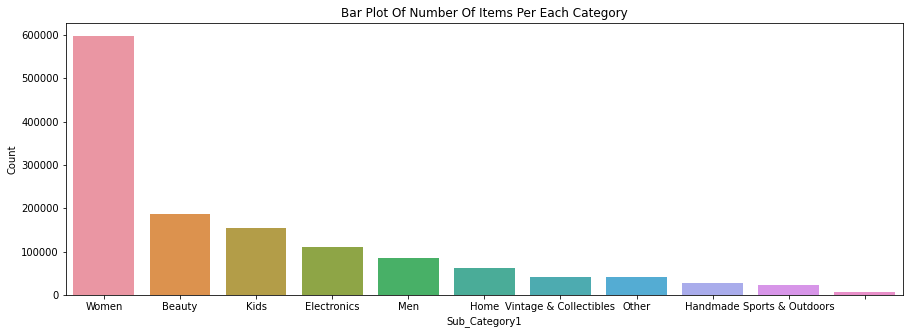

In [0]:
count=train_data['sub_category1'].value_counts()
print("Number of Unique Category1: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index,count)
plt.title("Bar Plot Of Number Of Items Per Each Category")
plt.xlabel('Sub_Category1')
plt.ylabel('Count')
plt.show()

**Observations:**


    *   We can see that the top three main categories of the products are women,Beauty and kids.
    *   Nearly 6 lakhs of products have women as main category.



**sub_category2:**

Number Of Unique Category2: 114


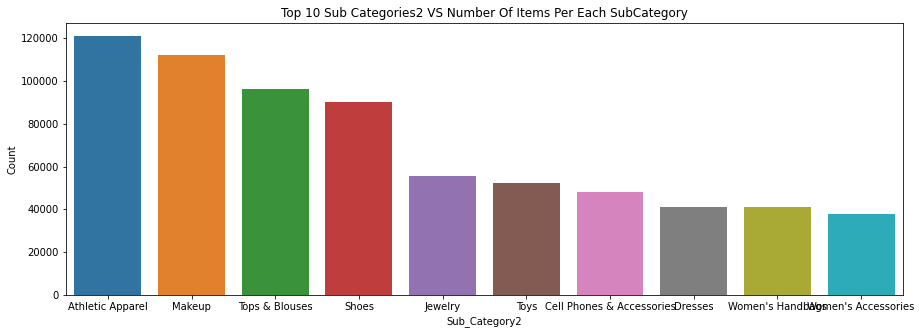

In [0]:
count=train_data['sub_category2'].value_counts()
print("Number Of Unique Category2: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.xlabel('Sub_Category2')
plt.ylabel('Count')
plt.title("Top 10 Sub Categories2 VS Number Of Items Per Each SubCategory")
plt.show()

**Observations:**


    *   Nearly 12 lakhs of products are Athletic Apparel
    *   Athletic Apparel, Makeup and Tops&Blouses are the top three repeating sub categories.



**sub_category3:**

Number Of Unique Category3: 869


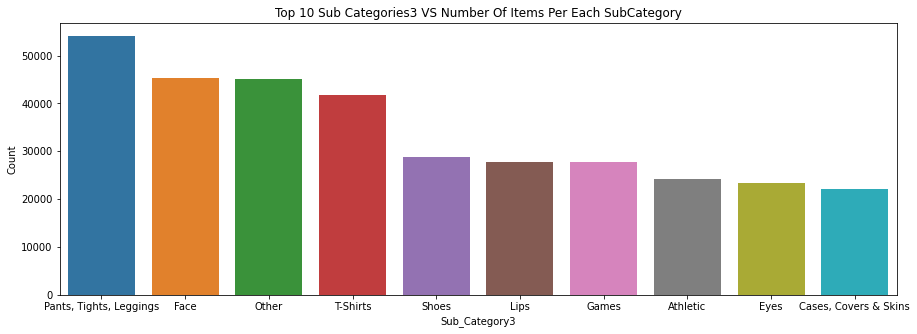

In [0]:
count=train_data['sub_category3'].value_counts()
print("Number Of Unique Category3: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.xlabel('Sub_Category3')
plt.ylabel('Count')
plt.title("Top 10 Sub Categories3 VS Number Of Items Per Each SubCategory")
plt.show()

**Observations:**


    *   Pants,Tights,Leggings ,Face and Other categories are the top three repeating things in subcategory level3.
    *   It is clear that the dataset contains products related to womens the most like cosmotics, dresses and some related accessories of womens.


**Brand_names:**

Number of Unique Brands: 4674


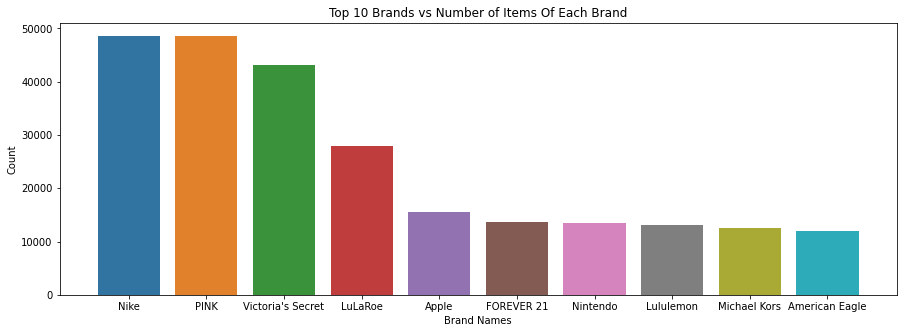

In [0]:
unique_brands=train_data['brand_name'].value_counts()
print("Number of Unique Brands: {}".format(len(unique_brands)))
plt.figure(figsize=(15,5))
sns.barplot(unique_brands.index[1:11],unique_brands[1:11])
plt.title('Top 10 Brands vs Number of Items Of Each Brand')
plt.xlabel('Brand Names')
plt.ylabel('Count')
plt.plot()
plt.show()

**Observations:**


    *   Nike and PINK are the two brands which are most common brands of the products in equal proportion. Victoria's Secret is to the next in the competition.
    *   As we already know that most of the products doesn't have brand in the data then obviously unknown brand will be in the top count among all these brands. But as a visualization part i skipped that one.



**Item_condition_id:**

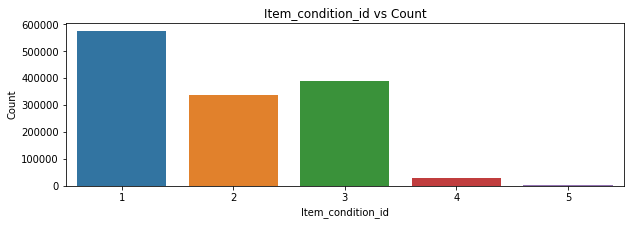

In [0]:
count=train_data['item_condition_id'].value_counts()
plt.figure(figsize=(10,3))
sns.barplot(count.index[:10],count[:10])
plt.title('Item_condition_id vs Count')
plt.xlabel('Item_condition_id')
plt.ylabel('Count')
plt.show()

**Observations:**


    *   Item_condition_id with 1 as a id is the most repeating one in the products.
    *   Nearly 60 lakhs of products have condition_id 1.
    *   item_condition_id with 5 as a id is the least repeating one.



**Shipping:**

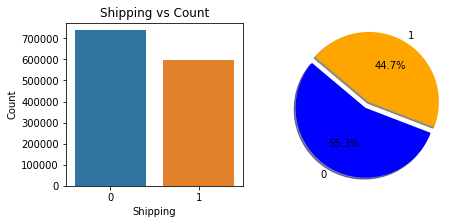

In [0]:
count=train_data['shipping'].value_counts()
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.barplot(count.index,count)
plt.xlabel('Shipping')
plt.ylabel('Count')
plt.title('Shipping vs Count')
plt.subplot(1,2,2)
labels = ['0','1']
sizes = count
colors = ['blue','orange']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Observations:**


*   We can see that most of the shipping fee is paid by buyers only.(55.3%)
*   44.7% of the product's whose shipping fee is paid by sellers.



**Price:**

In [0]:
train_data['price'].describe()

count    1.333494e+06
mean     2.675457e+01
std      3.866316e+01
min      3.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

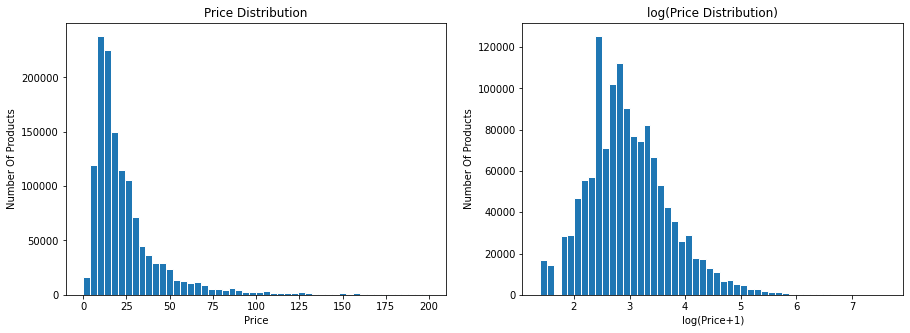

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(train_data['price'],bins=50,range=[0,200],edgecolor='white')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel("Number Of Products")
plt.subplot(1,2,2)
log_price=[np.log(i+1) for i in train_data['price']]
plt.hist(np.log(train_data['price']+1),bins=50,edgecolor='white')
plt.title("log(Price Distribution)")
plt.xlabel("log(Price+1)")
plt.ylabel("Number Of Products")
plt.show()

**Observations:**


    *   In the left graph we can see a tailedness in the curve whose values are deprecating towards 0.
    *   Hence we take log(price+1) instead of price.



**Bi-Variate Analysis:**

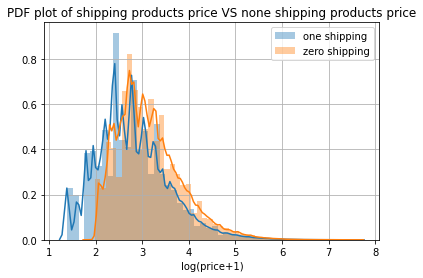

In [0]:
one_shipping=np.log(train_data.loc[train_data['shipping']==1,'price']+1)
zero_shipping=np.log(train_data.loc[train_data['shipping']==0,'price']+1)
sns.distplot(one_shipping,label='one shipping')
sns.distplot(zero_shipping,label='zero shipping')
plt.title('PDF plot of shipping products price VS none shipping products price')
plt.xlabel("log(price+1)")
plt.grid()
plt.legend()
plt.show()

**Observations:**


    *   In the above pdf plot shipping with 0 have a high peakedness than the shipping with 1.
    *   Both the curves are almost merged with each other.



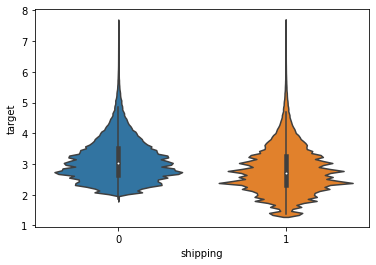

In [0]:
train_data['target']=np.log(train_data['price']+1)
sns.violinplot(x="shipping", y="target", data=train_data)
plt.show()

**Observations:**


    *   we can see that the 50th percentaile of shipping with 0 is higher than 50th percentaile of shipping with 1.
    *   From the graph we can see that most of the range is merging with each other.



**Branded Products VS Unknown Brand Products:**

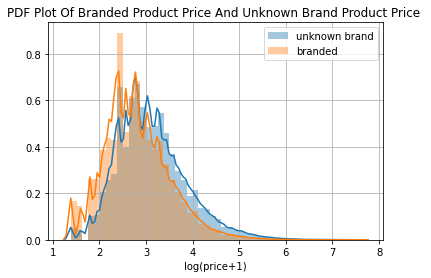

In [0]:
unknown_brand=np.log(train_data.loc[train_data['brand_name']!='Not known','price']+1)
brand=np.log(train_data.loc[train_data['brand_name']=='Not known','price']+1)
sns.distplot(unknown_brand,label='unknown brand')
sns.distplot(brand,label='branded')
plt.title('PDF Plot Of Branded Product Price And Unknown Brand Product Price ')
plt.xlabel('log(price+1)')
plt.grid()
plt.legend()
plt.show()

**Observations:**


    *   As i expected the price of branded products have high peakedness than the products with no brand.
    *   90 percent of both the plots are coinciding with each other.



**item_condition_id vs Price:**

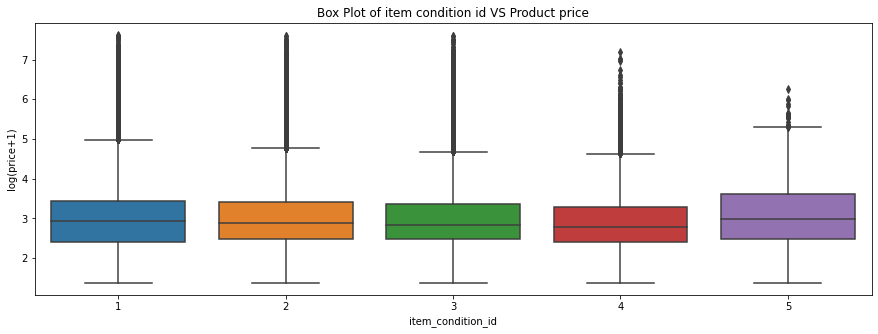

In [0]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train_data['item_condition_id'],y=np.log(train_data['price']+1))
plt.title('Box Plot of item condition id VS Product price')
plt.ylabel('log(price+1)')
plt.show()

**Observations:**


    *   The 50th percentile of products with item_condition_id 5 is more than the products with other condition id's.
    *   Almost all the boxplots have the same range except item_condition_id with 5 as a value.



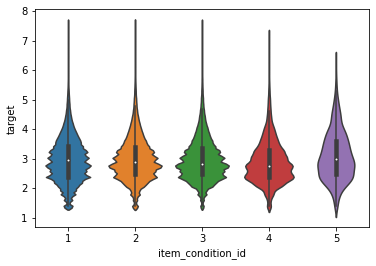

In [0]:
sns.violinplot(x='item_condition_id',y='target',data=train_data)
plt.show()

**Observations:**


    *   The above plot is the witness of the above observations.



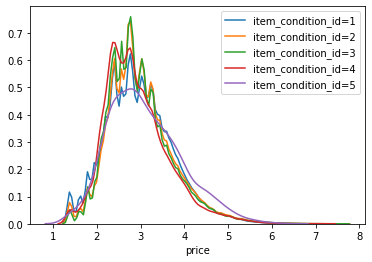

In [0]:
id1=np.log(train_data.loc[train_data['item_condition_id']==1,'price']+1)
id2=np.log(train_data.loc[train_data['item_condition_id']==2,'price']+1)
id3=np.log(train_data.loc[train_data['item_condition_id']==3,'price']+1)
id4=np.log(train_data.loc[train_data['item_condition_id']==4,'price']+1)
id5=np.log(train_data.loc[train_data['item_condition_id']==5,'price']+1)
sns.distplot(id1,hist=False,label='item_condition_id=1')
sns.distplot(id2,hist=False,label='item_condition_id=2')
sns.distplot(id3,hist=False,label='item_condition_id=3')
sns.distplot(id4,hist=False,label='item_condition_id=4')
sns.distplot(id5,hist=False,label='item_condition_id=5')
plt.show()

**Observations:**


    *   The above pdf plots shows the peakedness of the item_condition_id's.
    *   As i stated above condition id with 5 has the highest peakedness in the plot.
    *   All the plots are coinciding with each other.



**Sub_category VS price:**

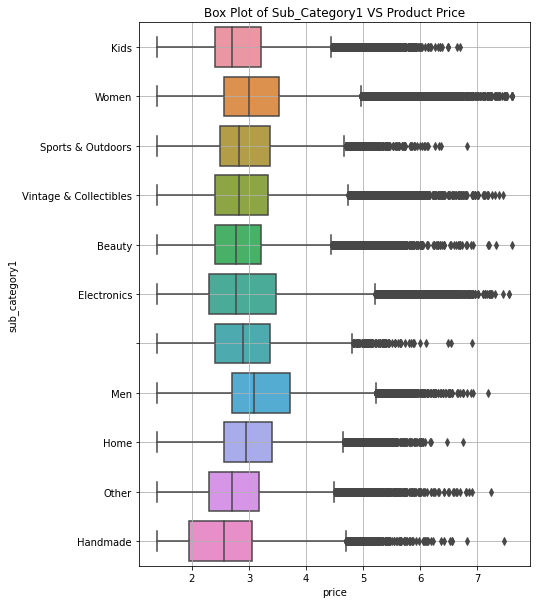

In [0]:
plt.figure(figsize=(7,10))
sns.boxplot(y=train_data['sub_category1'],x=np.log(train_data['price']+1))
plt.title('Box Plot of Sub_Category1 VS Product Price')
plt.grid()
plt.show()

**Observations:**


    *   The product with highest price has a main category-women. The next to it is Electronics.
    *   The 50th percentile of Electronics is the highest among all the above categories.
    *   The cheapest product has a category Handmade from the above categories.


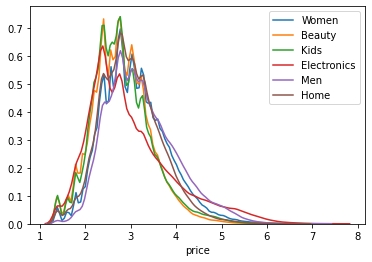

In [0]:
id1=np.log(train_data.loc[train_data['sub_category1']=='Women','price']+1)
id2=np.log(train_data.loc[train_data['sub_category1']=='Beauty','price']+1)
id3=np.log(train_data.loc[train_data['sub_category1']=='Kids','price']+1)
id4=np.log(train_data.loc[train_data['sub_category1']=='Electronics','price']+1)
id5=np.log(train_data.loc[train_data['sub_category1']=='Men','price']+1)
id6=np.log(train_data.loc[train_data['sub_category1']=='Home','price']+1)
sns.distplot(id1,hist=False,label='Women')
sns.distplot(id2,hist=False,label='Beauty')
sns.distplot(id3,hist=False,label='Kids')
sns.distplot(id4,hist=False,label='Electronics')
sns.distplot(id5,hist=False,label='Men')
sns.distplot(id6,hist=False,label='Home')
plt.show()

**Observations:**


    *   Almost all the pdf plots are coinciding with each other.
    *   Products with kids and beauty categories have the high peakedness in the curve.



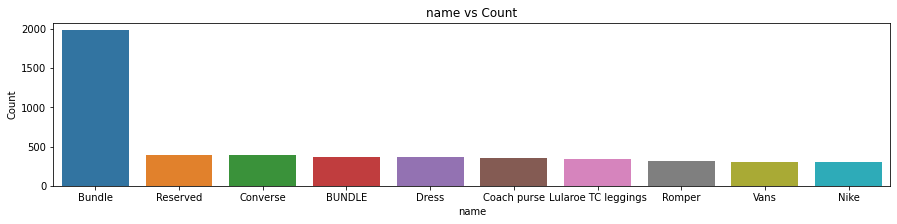

In [0]:
count=train_data['name'].value_counts()
plt.figure(figsize=(15,3))
sns.barplot(count.index[:10],count[:10])
plt.title('name vs Count')
plt.xlabel('name')
plt.ylabel('Count')
plt.show()

**Observations:**


*   Bundle, Reserved and Converse are the top three names of the products that are repeating the most.
*   Nearly their are 2000 Bundle name products.



**Feature Engineering:(Hack-1)**

*   Let's Introduce New features in the data
*   For textual data we can perform following feature engineering:


     1.  Number of stopwords
     2.  count of the words
     3.  Presence of Numerical data
     4.  Sentiment score Analysis.





Feature Engineering on textual Data:

https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41



1.   Let's count number of stop words in the given item description.
2.   This will be our new feature.



In [0]:
stopwords=set(stopwords.words('english'))

In [0]:
def stopwords_count(data):
  """this function counts the number of stopwords in each of the item_description"""
  count_stopwords=[]
  for i in tqdm(data['item_description']):
    count=0
    for j in i.split(' '):
      if j in stopwords: count+=1  #finding if the word is present in the nltk stopwords or not
    count_stopwords.append(count)
  return count_stopwords

In [0]:
train_data['count_stopwords']=stopwords_count(train_data)
cv_data['count_stopwords']=stopwords_count(cv_data)
test_data['count_stopwords']=stopwords_count(test_data)

100%|██████████| 3460725/3460725 [00:12<00:00, 280879.52it/s]


In [0]:
train_data['count_stopwords'].describe()

count    1.333494e+06
mean     5.982603e+00
std      9.063958e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      1.180000e+02
Name: count_stopwords, dtype: float64

Text Preprocessing:

In [0]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    """this function removies shorthands for the textual data..."""
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

**Removing StopWords**


1.   Usually text data contains stopwords which are no more useful as features as they are just to make a complete meaning in the english language
2.   Hence it is necessary to remove stopwords which are not useful for the regression model. 
3. One way to do that is by using **nltk** (Natural Language Tool Kit)



In [0]:
# https://gist.github.com/sebleier/554280
def text_preprocessing(data):
  """this function performs preprocessing the item_description """
  preprocessed_total = []
  for sentance in tqdm(data['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)  #removing stop words
    preprocessed_total.append(sent.lower().strip())
  return preprocessed_total

In [0]:
train_data['item_description']=text_preprocessing(train_data)
cv_data['item_description']=text_preprocessing(cv_data)
test_data['item_description']=text_preprocessing(test_data)

100%|██████████| 3460725/3460725 [01:18<00:00, 44182.04it/s]


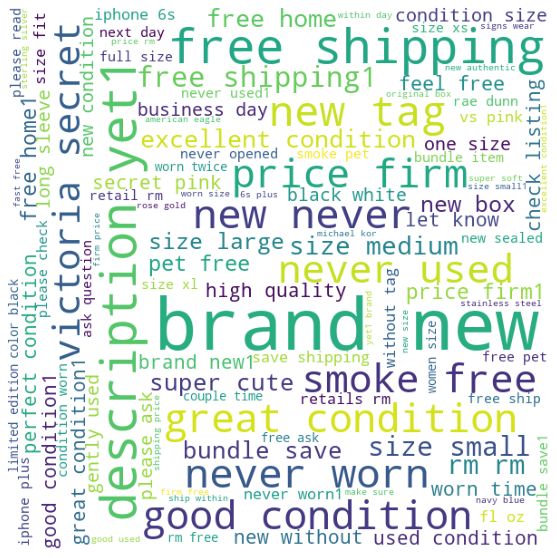

In [0]:
stopwords=set(STOPWORDS)
word_cloud = WordCloud(width = 600, height = 600,background_color ='white', stopwords=stopwords,min_font_size = 10).generate("1 ".join(train_data['item_description']))
plt.figure(figsize = (15, 10))
plt.imshow(word_cloud)
plt.axis('off')                                             
plt.show()

**Observations:**


    *   From the above wordcloud (brand,new,free,shipping,description,yet) are the most common words in the item description.
    *   Sellers are using new,free,shipping,description words to advertise their products to the buyers.



In [0]:
word_count={}
for sentence in tqdm(train_data['item_description']):
    for word in sentence.split(' '):
        if len(word)>=3:  #taking words which are of length>=3
            if word not in word_count:
                word_count[word]=1  #if word not present in dict assigning it to 1
            else:
                word_count[word]+=1 #else incrementing it by 1

100%|██████████| 1333494/1333494 [00:11<00:00, 117732.34it/s]


In [0]:
n_print=25
word_counter = collections.Counter(word_count)
words=[]
counter=[]
for word, count in word_counter.most_common(n_print):
    words.append(word)
    counter.append(count)

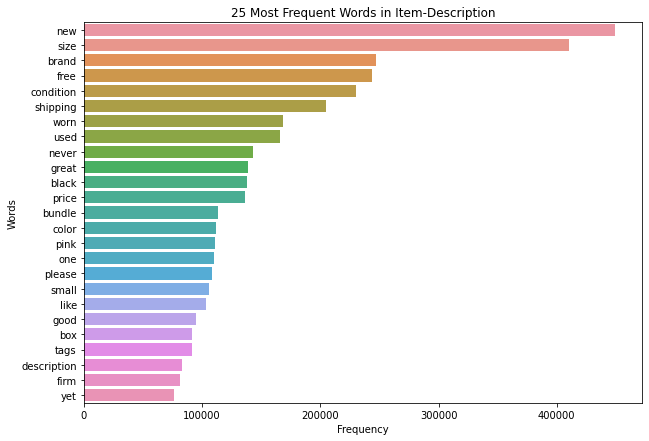

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(counter,words)
plt.title("25 Most Frequent Words in Item-Description")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

**Observations:**


    *   new and size are the two top words that are repeating in the item description.
    *   Nearly 45 lakhs of products use new in their item description.



**Feature Engineering(Hack-2)**

*   As a Hack let's take count of number of words in the item_description.
*   As the next feature engineering task let's use count of words,and sentiment score analysis as the new features in our task.

In [0]:
def description_length(data):
  """this function finds the length of the description basing on spaces in the statement"""
  description_length=[]
  for i in data['item_description']:
    description_length.append(len(i.split(' '))) #splitting statement using spaces and finding length of it
  return description_length

In [0]:
print("processing item_description in train_data...")
train_data['description_length']=description_length(train_data)
cv_data['description_length']=description_length(cv_data)
print(train_data.iloc[100]['item_description'],train_data.iloc[100]['description_length'])
print("="*100)
print("processing item_description in test_data...")
test_data['description_length']=description_length(test_data)
print(test_data.iloc[100]['item_description'],test_data.iloc[100]['description_length'])

processing item_description in train_data...
Two Size 24 cowgirl tuff new jeans 7
processing item_description in test_data...
Abercrombie boys khaki cargo shorts in a size 8. These shorts have an inside drawstring waist and are somewhat heavy. 20


In [0]:
train_data['description_length'].describe()

count    1.333494e+06
mean     2.570475e+01
std      3.041483e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      3.100000e+01
max      2.450000e+02
Name: description_length, dtype: float64

**Feature Engineering(Hack-3):**

Is_branded:


1.   We cam see that most of the products don't have brand.That can be used as a feature for our data.
2.   We know that a product with different brands vary with their price. This is based on the company which it is producing.
3.   A good brand will have a good price compared to the same product of different brand.
4.   Therefore two similar products with different brands(known brand,unknown brand) can help us to know the price of the product.
5.   If it's a branded product then it has a value of 1 else it has a value of 0.



In [0]:
def branded(data):
   """this function assigns a value 1 if a product has brand_name else 0"""
   is_branded=[]
   for i in data['brand_name']:
      if i=='Not known': is_branded.append(0) #if it is a Nan value i.e.. unknown brand make it as 0.
      else: is_branded.append(1)
   return is_branded
train_data['is_branded']=branded(train_data)
cv_data['is_branded']=branded(cv_data)
test_data['is_branded']=branded(test_data)

**Feature Engineering(Hack-4)**

**Sentiment Score Analysis:**

    1.   Sentiment Score Analysis is often used as a feature engineering hack dealing with textual data.
    2.   It tries to identify and extract opinions within a given text.
    3.   Sentiment Analysis is a tricky part but it comes into handy by using nltk in python.
    3.   It is going to return four values: positive, negative, neutral, and compound.
https://www.geeksforgeeks.org/facebook-sentiment-analysis-using-python/


==>   How Sentiment Score Analysis helps us in our task??
*   More often a positive description product may charge high. similarly a negative description product may charge low. 
*   That means their is some correlation with the description and the price(target value) in our data and it signs a good vibes for our task.





In [0]:
def sentiment_analysis(data):
   """this function performs sentiment score analysis of each datapoint"""
   sentiment_score = SentimentIntensityAnalyzer()
   sentiment = []
   for sentence in tqdm(data):
       sentiment.append(sentiment_score.polarity_scores(sentence))
   return sentiment

In [0]:
training_sentiment_score=sentiment_analysis(train_data['item_description']) 
cv_sentiment_score=sentiment_analysis(cv_data['item_description'])
testing_sentiment_score=sentiment_analysis(test_data['item_description'])

100%|██████████| 3460725/3460725 [10:54<00:00, 5291.50it/s]


In [0]:
def splitting_sentiment(sentiment_score):
  """this function splits sentiment analysis score into four further features ie positive,negative,compound and neutral"""
  positive=[]
  negative=[]
  neutral=[]
  compound=[]
  for i in sentiment_score:
    positive.append(i['pos'])
    negative.append(i['neg'])
    neutral.append(i['neu'])
    compound.append(i['compound'])
  return positive,negative,neutral,compound

In [0]:
print("Training Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(training_sentiment_score)
train_data['positive']=pos
train_data['negative']=neg
train_data['neutral']=neu
train_data['compound']=comp
print(train_data.iloc[50]['item_description'])
print(training_sentiment_score[50])

Training Data Sentiment Analysis: 
american flag bodysuit two buttons bottom size large fits like medium brand tobi
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}


In [0]:
print("CV Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(cv_sentiment_score)
cv_data['positive']=pos
cv_data['negative']=neg
cv_data['neutral']=neu
cv_data['compound']=comp
print(cv_data.iloc[50]['item_description'])
print(cv_sentiment_score[50])

CV Data Sentiment Analysis: 
brand new
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [0]:
print("Testing Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(testing_sentiment_score)
test_data['positive']=pos
test_data['negative']=neg
test_data['neutral']=neu
test_data['compound']=comp
print(test_data.iloc[50]['item_description'])
print(testing_sentiment_score[50])

Testing Data Sentiment Analysis: 
pok mon card
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [0]:
train_data['target']=np.log(np.array(train_data['price'].values)+1)
cv_data['target']=np.log(np.array(cv_data['price'].values)+1)
#train_data.drop(['train_id','category_name'],axis=1,inplace=True)
#cv_data.drop(['train_id','category_name'],axis=1,inplace=True)

In [0]:
#test_data=test_data.drop(['test_id','category_name'],axis=1)
#test_data.head(1)

**Feature Extraction:**


     *   After Preprocessing the data the next step that comes into mind is vectorization which is one of the model to extract features from the data.
     * Their are different categories of features like categorical, numerical, textual etc..,
     *   Textual Feature Extraction can be done through vectorization.
     *   For Categorical Features we use simple **BagOfWords** and for textual data we use **TFIDF** Vectorizer(Term Frequency Inverse Document Frequency).



**Vectorization**

**Categorical Features:**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer=CountVectorizer().fit(train_data['sub_category1'])                     #fitting
bow_cat1_train=countvectorizer.transform(train_data['sub_category1'])
bow_cat1_cv=countvectorizer.transform(cv_data['sub_category1'])
bow_cat1_test=countvectorizer.transform(test_data['sub_category1'])
print("After Vectorization of sub category1 feature: ")
print(bow_cat1_train.shape)
print(bow_cat1_cv.shape)
print(bow_cat1_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names())
print("="*125)
countvectorizer=CountVectorizer().fit(train_data['sub_category2'])   #fitting
bow_cat2_train=countvectorizer.transform(train_data['sub_category2'])
bow_cat2_cv=countvectorizer.transform(cv_data['sub_category2'])
bow_cat2_test=countvectorizer.transform(test_data['sub_category2'])
print("After Vectorization of sub category2 feature: ")
print(bow_cat2_train.shape)
print(bow_cat2_cv.shape)
print(bow_cat2_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)
countvectorizer=CountVectorizer().fit(train_data['sub_category3'])   #fitting
bow_cat3_train=countvectorizer.transform(train_data['sub_category3'])
bow_cat3_cv=countvectorizer.transform(cv_data['sub_category3'])
bow_cat3_test=countvectorizer.transform(test_data['sub_category3'])
print("After Vectorization of sub category3 feature: ")
print(bow_cat3_train.shape)
print(bow_cat3_cv.shape)
print(bow_cat3_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)
countvectorizer=CountVectorizer().fit(train_data['brand_name'])  #fitting
bow_brand_train=countvectorizer.transform(train_data['brand_name'])
bow_brand_cv=countvectorizer.transform(cv_data['brand_name'])
bow_brand_test=countvectorizer.transform(test_data['brand_name'])
print("After Vectorization of brand_name feature: ")
print(bow_brand_train.shape)
print(bow_brand_cv.shape)
print(bow_brand_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)

After Vectorization of sub category1 feature: 
(1333494, 12)
(148167, 12)
(3460725, 12)
Some Features are: 
['beauty', 'collectibles', 'electronics', 'handmade', 'home', 'kids', 'men', 'other', 'outdoors', 'sports', 'vintage', 'women']
After Vectorization of sub category2 feature: 
(1333494, 141)
(148167, 141)
(3460725, 141)
Some Features are: 
['feeding', 'footwear', 'fragrance', 'furniture', 'games', 'gear', 'geekery', 'girls', 'glass', 'golf', 'goods', 'gps', 'hair', 'handbags', 'health', 'holidays', 'home', 'hoodies', 'housewares', 'instruments', 'items', 'jackets', 'jeans', 'jewelry', 'kids']
After Vectorization of sub category3 feature: 
(1333494, 963)
(148167, 963)
(3460725, 963)
Some Features are: 
['basketball', 'baskets', 'bass', 'bath', 'bathing', 'bathroom', 'batteries', 'beach', 'bead', 'beading', 'beads', 'bear', 'bears', 'bed', 'bedding', 'bedroom', 'beds', 'bedspreads', 'beer', 'belt', 'belts', 'beverage', 'bibles', 'bibs', 'bicycle']
After Vectorization of brand_name f

In [0]:
countvectorizer=CountVectorizer(min_df=10).fit(train_data['name'])  #fitting
bow_name_train=countvectorizer.transform(train_data['name'])
bow_name_cv=countvectorizer.transform(cv_data['name'])
bow_name_test=countvectorizer.transform(test_data['name'])
print("After Vectorization of brand_name feature: ")
print(bow_name_train.shape)
print(bow_name_cv.shape)
print(bow_name_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[10000:10025])

After Vectorization of brand_name feature: 
(1333494, 16794)
(148167, 16794)
(3460725, 16794)
Some Features are: 
['mojito', 'mojo', 'molang', 'mold', 'molds', 'moleskine', 'mollie', 'molly', 'moltres', 'moly', 'mom', 'moment', 'moments', 'momlife', 'momma', 'mommy', 'momo', 'momof3', 'moms', 'mon', 'mona', 'monaco', 'monarch', 'monat', 'moncler']


**Tfidf Vectorization on "item description" feature**

In [0]:
tfidfvectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000).fit(train_data['item_description']) #fitting
tfidf_description_train=tfidfvectorizer.transform(train_data['item_description'])
tfidf_description_cv=tfidfvectorizer.transform(cv_data['item_description'])
tfidf_description_test=tfidfvectorizer.transform(test_data['item_description'])
print("After Vectorization of item description feature: ")
print(tfidf_description_train.shape)
print(tfidf_description_cv.shape)
print(tfidf_description_test.shape)
print("Some Features are: ")
print(tfidfvectorizer.get_feature_names()[3025:3050])  #getting 25 random features.

After Vectorization of item description feature: 
(1333494, 5000)
(148167, 5000)
(3460725, 5000)
Some Features are: 
['packing', 'packs', 'pacsun', 'pad', 'padded', 'padding', 'pads', 'page', 'pages', 'paid', 'paid product', 'paid rm', 'pain', 'paint', 'painted', 'pair', 'pair rm', 'paired', 'pairs', 'pairs rm', 'paisley', 'pajama', 'pajamas', 'pale', 'pale pink']


**Numerical Features:**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(np.array(train_data['positive']).reshape(-1,1))   #fitting
positive_train = scaler.transform(np.array(train_data['positive']).reshape(-1,1))
positive_cv = scaler.transform(np.array(cv_data['positive']).reshape(-1,1))
positive_test = scaler.transform(np.array(test_data['positive']).reshape(-1,1))
print(positive_train[50:55].reshape(1,-1)[0])    #printing 5 random postive sentiment scores 
print("After Preprocessing of positive sentiment score:")
print(positive_train.shape)
print(positive_cv.shape)
print(positive_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['negative']).reshape(-1,1))  #fitting
negative_train=scaler.transform(np.array(train_data['negative']).reshape(-1,1))
negative_cv=scaler.transform(np.array(cv_data['negative']).reshape(-1,1))
negative_test=scaler.transform(np.array(test_data['negative']).reshape(-1,1))
print(negative_train[25:30].reshape(1,-1)[0])    #printing 5 random negative sentiment score
print("After Preprocessing of negative sentiment score:")
print(negative_train.shape)
print(negative_cv.shape)
print(negative_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['neutral']).reshape(-1,1))   #fitting
neutral_train=scaler.transform(np.array(train_data['neutral']).reshape(-1,1))
neutral_cv=scaler.transform(np.array(cv_data['neutral']).reshape(-1,1))
neutral_test=scaler.transform(np.array(test_data['neutral']).reshape(-1,1))
print(neutral_train[5:10].reshape(1,-1)[0])     #printing 5 random neutral sentiment score
print("After Preprocessing of neutral sentiment score:")
print(neutral_train.shape)
print(neutral_cv.shape)
print(neutral_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['compound']).reshape(-1,1))  #fitting
compound_train=scaler.transform(np.array(train_data['compound']).reshape(-1,1))
compound_cv=scaler.transform(np.array(cv_data['compound']).reshape(-1,1))
compound_test=scaler.transform(np.array(test_data['compound']).reshape(-1,1))
print(compound_train[35:40].reshape(1,-1)[0])   #printing 5 random compound sentiment score
print("After Preprocessing of compound sentiment score:")
print(compound_train.shape)
print(compound_cv.shape)
print(compound_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['description_length']).reshape(-1,1))  #fitting
length_train=scaler.transform(np.array(train_data['description_length']).reshape(-1,1))
length_cv=scaler.transform(np.array(cv_data['description_length']).reshape(-1,1))
length_test=scaler.transform(np.array(test_data['description_length']).reshape(-1,1))
print(length_train[1:5].reshape(1,-1)[0])       #printing 5 random description lengths
print("After Preprocessing of description length:")
print(length_train.shape)
print(length_cv.shape)
print(length_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['count_stopwords']).reshape(-1,1))   #fitting
stopword_train=scaler.transform(np.array(train_data['count_stopwords']).reshape(-1,1))
stopword_cv=scaler.transform(np.array(cv_data['count_stopwords']).reshape(-1,1))
stopword_test=scaler.transform(np.array(test_data['count_stopwords']).reshape(-1,1))
print(stopword_train[15:20].reshape(1,-1)[0])   #printing 5 random stopwords count
print("After Preprocessing of count_stopwords feature:")
print(stopword_train.shape)
print(stopword_cv.shape)
print(stopword_test.shape)

[-0.15288459  2.54943072 -1.02329326  1.55756967 -0.64881511]
After Preprocessing of positive sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[-0.41824262  1.7012617   1.92436742 -0.20629219 -0.41824262]
After Preprocessing of negative sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[ 1.13290915 -0.30926719  1.13290915 -0.87011354 -0.53077793]
After Preprocessing of neutral sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[ 0.10367151 -0.28067616  1.48874009  1.08718659  0.8822349 ]
After Preprocessing of compound sentiment score:
(1333494, 1)
(148167, 1)
(3460725, 1)
[-0.1218073  -0.64786662 -0.61498792 -0.38483696]
After Preprocessing of description length:
(1333494, 1)
(148167, 1)
(3460725, 1)
[-0.66004331  0.11224649  1.98780745  0.11224649 -0.21873485]
After Preprocessing of count_stopwords feature:
(1333494, 1)
(148167, 1)
(3460725, 1)


In [0]:
#https://stackoverflow.com/questions/36285155/pandas-get-dummies

features_train = csr_matrix(pd.get_dummies(train_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
features_cv = csr_matrix(pd.get_dummies(cv_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
features_test = csr_matrix(pd.get_dummies(test_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
print(features_train.shape)
print(features_cv.shape)
print(features_test.shape)

(1333494, 2)
(148167, 2)
(3460725, 2)


**Concatenation Of All the features in train, cv and test data**

In [0]:
#https://stackoverflow.com/questions/43018711/about-numpys-concatenate-hstack-vstack-functions
from scipy.sparse import hstack
X_train=hstack((bow_cat1_train,bow_cat2_train,bow_cat3_train,bow_brand_train,bow_name_train,tfidf_description_train,positive_train,negative_train,neutral_train,compound_train,features_train,length_train,stopword_train)).tocsr()
X_cv=hstack((bow_cat1_cv,bow_cat2_cv,bow_cat3_cv,bow_brand_cv,bow_name_cv,tfidf_description_cv,positive_cv,negative_cv,neutral_cv,compound_cv,features_cv,length_cv,stopword_cv)).tocsr()
X_test=hstack((bow_cat1_test,bow_cat2_test,bow_cat3_test,bow_brand_test,bow_name_test,tfidf_description_test,positive_test,negative_test,neutral_test,compound_test,features_test,length_test,stopword_test)).tocsr()
print("Shape of train data: ",X_train.shape) #train
print("Shape of cv data: ",X_cv.shape)   #cv
print("Shape of test data: ",X_test.shape)   #test

Shape of train data:  (1333494, 27838)
Shape of cv data:  (148167, 27838)
Shape of test data:  (3460725, 27838)


https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/

A guideness to use regression models in Machine learning

**Model-1 : Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression
linearregression=LinearRegression(normalize=True)
linearregression.fit(X_train,train_data['target'])  #fitting
ytrain_predict=linearregression.predict(X_train)
ycv_predict=linearregression.predict(X_cv)
train_error=np.sqrt(mean_squared_error(train_data['target'],ytrain_predict))
cv_error=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("With Linear Regression RMSLE on train is {} RMSLE on cv is {}".format(train_error,cv_error))

With Linear Regression RMSLE on train is 0.46090123650225584 RMSLE on cv is 0.4693486598717122


In [0]:
ycv_linear=linearregression.predict(X_cv)
ytest_linear=linearregression.predict(X_test)

**Description:**


    *   With a simple linear regression model we got 0.4693 RMSLE.
    *   Their is no such thing of hyper parameter tuning in linear regression since the model it self finds a plane that best fits to the data.
    *   Well it's a good score with a simple model but let's try out some other model that will improve the metric by performing hyper parameter tuning.   





**Model-2 : Lasso Regression**

In [0]:
from sklearn.linear_model import Lasso
params={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1]}
lasso=Lasso(fit_intercept=False)
gridsearchcv_lasso=GridSearchCV(lasso,param_grid=params,n_jobs=-1,cv=3,verbose=1,return_train_score=True)
gridsearchcv_lasso.fit(X_train,train_data['target'])  #fitting

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 23.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Lasso Regression: 
train_error:  [0.46424316736234644, 0.4791803637812362, 0.524667226421087, 0.602598236163241, 0.6849090885571419, 0.7592210426935225, 1.5530177567469883]
cv_error:  [0.46992394285359196, 0.47952353838212114, 0.5220675071491777, 0.601640635113616, 0.6850337911742654, 0.7604648652666045, 1.5518486088341135]




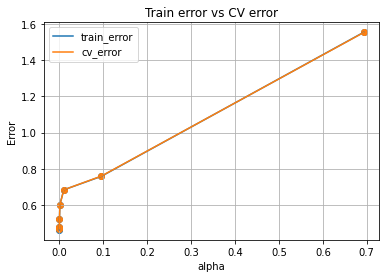

In [0]:
alpha=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1]
alpha=[math.log(i+1) for i in alpha]
values=pd.DataFrame(gridsearchcv_lasso.cv_results_).groupby(['param_alpha']).min().unstack()
train_error=values['mean_train_score']
cv_error=values['mean_test_score']
print("Lasso Regression: ")
print("train_error: ",train_error)
print("cv_error: ",cv_error)
print("\n")
plt.plot(alpha,train_error,label="train_error")
plt.scatter(alpha,train_error)
plt.plot(alpha,cv_error,label='cv_error')
plt.scatter(alpha,cv_error)
plt.title("Train error vs CV error")
plt.xlabel("alpha")
plt.ylabel("Error")
plt.grid()
plt.legend()
plt.show()

**Observations:**


    *   From the above error plot we can see that both the train and cv plots are coinciding with each other.
    *   The above plot is the evidence above the less overfitting of the model using lasso regression.
    *   As the alpha(hyper parameter) value is increasing the rmsle error is also increasing. Hence we will choose the least alpha value.



In [0]:
gridsearchcv_lasso.best_params_

{'alpha': 1e-06}

**Lasso Regression with Best Hyper parameters:**

In [0]:
lasso = Lasso(alpha=1e-06,fit_intercept=False)
print("Model is fitting!!!")
lasso.fit(X_train, train_data['target'])
ytrain_predict=lasso.predict(X_train)
ycv_predict=lasso.predict(X_cv)
train_ = np.sqrt(mean_squared_error(train_data['target'], ytrain_predict))
cv_=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("Lasso Regression with alpha = {} RMSLE on train is {} RMSLE on cv is {}".format(1e-06,train_,cv_))

Model is fitting!!!
Lasso Regression with alpha = 1e-06 RMSLE on train is 0.46424316736234644 RMSLE on cv is 0.46992394285359196


In [0]:
ycv_lasso=lasso.predict(X_cv)
ytest_lasso=lasso.predict(X_test)

**Description:**


    *   least absolute shrinkage and selection operator simply LASSO is a regression analysis method that performs both variable selection and regularization
    *   Lasso Regression is similar to linear regression but in addition to linear regression it performs shinkage.
    *   Unlike linear regression LASSO has hyper parameter tuning with hyper parameters: alpha
    *   After Doing everthing we got 0.4699 RMSLE which is roughly equal to the RMSLE of linear regression.
    *   Their is a small difference between train and cv error as compared to LR that means the model is not overfitting.



**Ridge Regression:**

In [0]:
from sklearn.linear_model import Ridge
params={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100],'solver':['cholesky','lsqr']}
ridge=Ridge(fit_intercept=False)
gridsearchcv_ridge=GridSearchCV(ridge,param_grid=params,njobs=-1,cv=3,verbose=1,return_train_score=True)
gridsearchcv_ridge.fit(X_train,train_data['target'])

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 4 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 22.0min finished 
GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
                             iid='deprecated', n_jobs=None,
                             param_grid={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
                                         'solver': ['cholesky', 'lsqr']},
                             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
                             scoring=None, verbose=1)


In [0]:
def return_result(gridsearchcv,rate):
    values=pd.DataFrame(gridsearchcv.cv_results_).groupby(['param_alpha','param_learning_rate']).min().unstack()
    train_error=[]
    cv_error=[]
    for i in range(val.shape[0]):
       train_error.append(values.iloc[i]['mean_train_score'==rate])
       cv_error.append(values.iloc[i]['mean_test_score'==rate])
    print("with learning_rate: {}".format(rate))
    print("train_error: ",train_error)
    print("cv_error: ",cv_error)
    print("\n")
    return train_error,cv_error

with learning rate: cholesky
train_error:  [0.46123448606764766, 0.4612344861744916, 0.4612344948585147, 0.4612349136577718, 0.4612473569407215, 0.4614697607065464, 0.46373220171730173, 0.4770768200604874]
cv_error:  [0.4696215399931567, 0.4696209351546391, 0.46961505451113716, 0.46956801904299456, 0.4693693783323686, 0.4688873665981245, 0.46679662525041055, 0.4798964886244808]


with learning rate: lsqr
train_error:  [0.47991845817477785, 0.4799184581746841, 0.4799184581742052, 0.47991845821517004, 0.4799184631972253, 0.47991896731873046, 0.47996663778082416, 0.48746082188140344]
cv_error:  [0.4804947057712104, 0.48049470476861333, 0.48049469474313433, 0.4804945945374393, 0.480493597387021, 0.4804841134999115, 0.48043514146269295, 0.4866231865954394]




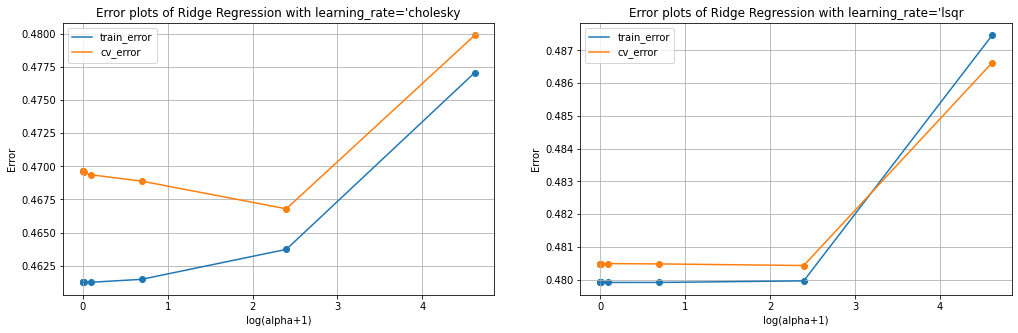

In [0]:
alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100]
alpha=[math.log(i+1) for i in alpha]
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
train_error_cholesky,cv_error_cholesky=return_result(gridsearchcv_ridge,'cholesky')
plt.plot(alpha,train_error_cholesky,label='train_error')
plt.scatter(alpha,train_error_cholesky)
plt.plot(alpha,cv_error_cholesky,label='cv_error')
plt.xlabel('log(alpha+1)')
plt.ylabel('Error')
plt.scatter(alpha,cv_error_cholesky)
plt.title("Error plots of Ridge Regression with learning_rate='cholesky")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
train_error_lsqr,cv_error_lsqr=return_result(gridsearchcv_ridge,'lsqr')
plt.plot(alpha,train_error_lsqr,label='train_error')
plt.scatter(alpha,train_error_lsqr)
plt.plot(alpha,cv_error_lsqr,label='cv_error')
plt.scatter(alpha,cv_error_lsqr)
plt.title("Error plots of Ridge Regression with learning_rate='lsqr")
plt.xlabel("log(alpha+1)")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

**Observations:**


    *   We trained the model for two learning rates. The error plot of learning rate with **cholesky** on the left and learning rate with **lsqr** on the right side of the plot.**
    *   learning rate with 'cholesky' is giving low error metric compared to 'lsqr' learning rate. But the train and cv error plots in 'lsqr' are more coinciding than the 'cholesky' plot.
    *   Since In the case of this case study error metric is important 'cholesky' be the best learning rate



In [0]:
gridsearchcv_ridge.best_params_

{'alpha': 10, 'solver': 'cholesky'}

**Description:**


    *   Hyper parameter plays an important role in model predictions because using hyper parameter tuning we can protest our model from getting underfit and overfit
    *   From the Above Error plot we need to pick alpha value(hyper parameter) in such a way that both train and test error are low.
    *   With alpha=1 both the test error and train error are closer and are lesser than alpha>1. 
    *   With alpha=0.0001 the train error is low but test error is much higher than train error.
    *   Hence we will choose alpha=10 as the best hyperparameter in this case.



Ridge Regression with Best Hyper Parameters:

In [0]:
ridge = Ridge(alpha=10,solver='cholesky',fit_intercept=False)
print("Model is fitting!!!")
ridge.fit(X_train, train_data['target'])
ytrain_cholesky_predict=ridge.predict(X_train)
ycv_cholesky_predict=ridge.predict(X_cv)
train_ = np.sqrt(mean_squared_error(train_data['target'], ytrain_cholesky_predict))
cv_=np.sqrt(mean_squared_error(cv_data['target'],ycv_cholesky_predict))
print("Ridge Regression with alpha = {} RMSLE on train is {} RMSLE on cv is {}".format(1,train_,cv_))

Model is fitting!!!
Ridge Regression with alpha = 1 RMSLE on train is 0.46373220171730173 RMSLE on cv is 0.46679662525041055


In [0]:
ycv_ridge=ridge.predict(X_cv)
ytest_ridge=ridge.predict(X_test)

**Description:**


    *   Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity.
    *   It reduces the model complexity by coefficient shrinkage.
    *   It is also a linear model.
    *   This Regression model also have hyper parameters in it {alpha , solver}.
    *   After doing Tuning to the model we got 0.4667 RMSLE which is slightly better than LR and lasso regression model.



**SGD REGRESSOR**

In [0]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss='squared_loss', max_iter=200, penalty='l2',fit_intercept=False,l1_ratio=0.6)
params={'alpha':[0.000000001,0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000],'learning_rate':['invscaling','adaptive']}
gridsearchcv=GridSearchCV(sgd,param_grid=params,return_train_score=True)
gridsearchcv.fit(X_train,train_data['target'])   

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=False,
                                    l1_ratio=0.6, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=200,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.000000001,0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1],
                         'learning_rate': ['invscaling', 'adaptive']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

with learning rate: adaptive
train_error:  [0.46258151544524667, 0.46258245482048427, 0.46483649432062113, 0.48016147635359874, 0.5205752819395818, 0.5917970847895279, 0.7255153319689673, 0.4625804956434685, 1.0049017176141175]
cv_error:  [0.4688558627790037, 0.4688619000720196, 0.4692822488228858, 0.4805051420009014, 0.5189131079049061, 0.5906065711592959, 0.7249848311406205, 0.4688377923404662, 1.0050139402008162]


with learning rate: invscaling
train_error:  [0.4893846551558464, 0.48954774037696247, 0.48973125711047344, 0.4929607195199796, 0.5213178486837378, 0.5926636632267787, 0.7266517284822288, 0.4894245397695104]
cv_error:  [0.4884044531500078, 0.48849486404927006, 0.48871279763132197, 0.4917611240507121, 0.5195797694682748, 0.5915081361184699, 0.7261611151478855, 0.48838273951167877]




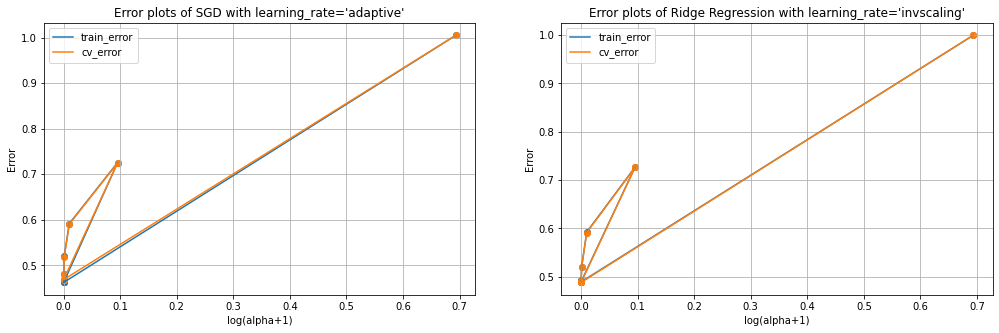

In [0]:
alpha=[0.000000001,0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1]
alpha=[math.log(i+1) for i in alpha]
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
train_error_adaptive,cv_error_adaptive=return_result(gridsearchcv,'adaptive')
plt.plot(alpha,train_error_adaptive,label='train_error')
plt.scatter(alpha,train_error_adaptive)
plt.plot(alpha,cv_error_adaptive,label='cv_error')
plt.xlabel('log(alpha+1)')
plt.ylabel('Error')
plt.scatter(alpha,cv_error_adaptive)
plt.title("Error plots of SGD with learning_rate='adaptive'")
plt.legend()
plt.grid()
plt.subplot(1,2,2)
train_error_inv,cv_error_inv=return_result(gridsearchcv,'invscaling')
plt.plot(alpha,train_error_inv,label='train_error')
plt.scatter(alpha,train_error_inv)
plt.plot(alpha,cv_error_inv,label='cv_error')
plt.scatter(alpha,cv_error_inv)
plt.title("Error plots of SGD with learning_rate='invscaling'")
plt.xlabel("log(alpha+1)")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

**Observations:**


    *   Like As in ridge regression here also we have two learning rates adaptive and invscaling.
    *   In both of the case train and cv are coinciding hence it is more stronger to say that the model is not overfitting.
    *   In the left plot the error is going decreased slightly compared to the error plot on the right side.



In [0]:
gridsearchcv.best_params_

{'alpha': 1e-09, 'learning_rate': 'adaptive}


Schocatsic gradient regressor with best hyper parameters:

In [0]:
sgd = SGDRegressor(alpha=1e-09,loss='squared_loss',learning_rate='adaptive', max_iter=200, penalty='l2',fit_intercept=False,l1_ratio=0.6)
sgd.fit(X_train, train_data['target'])
ytrain_predict=sgd.predict(X_train)
ycv_predict=sgd.predict(X_cv)
train_ = np.sqrt(mean_squared_error(train_data['target'], ytrain_predict))
cv_=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("SGD Regression with alpha = {} RMSLE on train is {} RMSLE on cv is {}".format(1e-09,train_,cv_))

SGD Regression with alpha = 1e-09 RMSLE on train is 0.462581674189578 RMSLE on cv is 0.46885382806201875


**Description:**


    *   Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear)
    *   the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule i.e.. Learning rate.
    *   After trying learning_rate with adaptive nature we got 0.4688 RMSLE on cv data which is slighly better than the above linear models.



**Boosting Models:**

**LGBM Regressor**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

In [0]:
#pip install lightgbm

In [0]:
params={'learning_rate':[0.1,0.3,0.5,0.6],'max_depth':[5,8,12,15],'n_estimators':[50,100,150,200],'num_leaves':[15,25,50,75],'boosting_type':['gbdt']}
lgbm_params={'sub_sample':0.9,'colsample_bytree':0.8,'min_child_samples':50,'objective':'regression'}
lgbm_regressor=LGBMRegressor(**lgbm_params)
gridsearchcv=GridSearchCV(lgbm_regressor,param_grid=params,n_jobs=-1,cv=3,verbose=1)
gridsearchcv.fit(X_train,train_data['target'],early_stopping_rounds=100,verbose=True)

Fitting 3 folds for each of 16 candidates, totalling 576 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 115.3min
[Parallel(n_jobs=-1)]: Done 576 taks       | elapsed: 126min


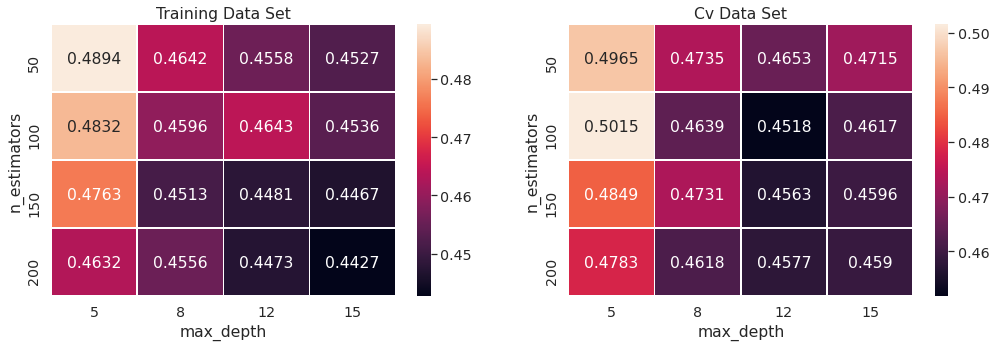

In [0]:
fig,ax=plt.subplots(1,2,figsize=(17,5)) 
sns.set(font_scale=1.3) 
data=pd.DataFrame(gridsearchcv.cv_results_).groupby(['param_min_samples_split','param_max_depth']).max().unstack()[['mean_train_score','mean_test_score']] 
sns.heatmap(data.mean_train_score,annot=True,linewidths=0.7,fmt='.4g',ax=ax[0],square=False,yticklabels=['50','100','150','200'])
ax[0].set_title("Training Data Set") 
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('n_estimators')
sns.heatmap(data.mean_test_score,annot=True,linewidths=.7,fmt='.4g',ax=ax[1],square=False,yticklabels=['50','100','150','200'])
ax[1].set_title("Cv Data Set")
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel("n_estimators")
plt.show()

**Observations:**


    *   Heat maps can be used to represent the 2D data.
    *   we can see that the lgbm worked well with max_depth: 15 and n_estimators: 200.
    *   Compared to all the above ML models lgbm is good working with this data giving 0.4427 on train data and 0.4590 on cv data.



In [0]:
gridsearchcv.best_params_

{'learning_rate': 0.1, 'max_depth: 15, 'n_estimators: 200', 'num_leaves: 75', 'boosting_type': 'gbdt'}


In [0]:
from lightgbm import LGBMRegressor
params={'learning_rate':[0.1],'max_depth':[15],'n_estimators':[200],'num_leaves':[75],'boosting_type':['gbdt']}
lgbm_regressor=LGBMRegressor(learning_rate=0.5,max_depth=8,n_estimators=500,num_leaves=80,boosting_type='gbdt',sub_sample=0.9,colsample_bytree=0.8,min_child_samples=50)
lgbm_regressor.fit(X_train,train_data['target'])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', learning_rate=0.5, max_depth=8,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=80, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              sub_sample=0.9, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [0]:
ytrain_predict=lgbm_regressor.predict(X_train)
ycv_predict=lgbm_regressor.predict(X_cv)
training = np.sqrt(mean_squared_error(train_data['target'], ytrain_predict))
cving=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("RMSLE of train is {} RMSLE of test is {}".format(training,cving))

RMSLE of train is 0.44273270471579435 RMSLE of test is 0.45903311631135346


In [0]:
ycv_lgbm=lgbm_regressor.predict(X_cv)
ytest_lgbm=lgbm_regressor.predict(X_test)

**Description:**


    *   Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm.
    *   Faster training speed and higher efficiency than the other models we trained on the dataset.
    *   We can see that it occupies less RAM.
    *   It is supporting Parallel learning and it is compatible to higher datasets.
    *   It has the better performance than any other model we trained.After training the LGBM model we get 0.4590 RMSLE on cv data.Which is far better than other models.

**Description: Result of all linear models and boosing:**


    *   Linear Regression on cv: 0.4696
    *   Lasso Regression on cv: 0.4699
    *   Ridge Regression on cv: 0.4687
    *   SGD on cv: 0.4688
    *   LGBM on cv: 0.4590


1.   We can see that the RMSLE on all the models is almost equal that is varying in small proportions.
2.   Let's try merging the results of all models.





In [0]:
Y_final=(ycv_lgbm*0.6+ycv_lasso*0.2+ycv_ridge*0.1+ycv_linear*0.1)
ycv_final=Y_final
print(np.sqrt(mean_squared_error(cv_data['target'],ycv_final)))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

0.44872398005672004


In [0]:
Y_test=(ytest_lgbm*0.6+ytest_lasso*0.2+ytest_ridge*0.1+ytest_linear*0.1)

**Storing Results:**

In [0]:
mercari_prediction_cv=pd.DataFrame(np.exp(Y_final)+1,columns=['y_final'])
mercari_prediction_cv['ycv_lgbm']=np.exp(ycv_lgbm)+1
mercari_prediction_cv['ycv_linear']=np.exp(ycv_linear)+1
mercari_prediction_cv['ycv_ridge']=np.exp(ycv_ridge)+1

In [0]:
mercari_prediction_test=pd.DataFrame(np.exp(Y_test)+1,columns=['y_test'])
mercari_prediction_test['ytest_lgbm']=np.exp(ytest_lgbm)+1
mercari_prediction_test['ytest_linear']=np.exp(ytest_linear)+1
mercari_prediction_test['ytest_ridge']=np.exp(ytest_ridge)+1

In [0]:
mercari_prediction_cv.to_csv("/content/mercari_predictioncv.csv")

In [0]:
mercari_prediction_test.to_csv("/content/mercari_predictiontest.csv")

**MLP On Mercari Price Suggestion Challenge:**



    *   A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs.
    *   An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.
    *   It's a deep learning method.
    *   Unlike machine learning models MLP's itself learns the best features using weights.
    *   Let's Use an MLP model and check whether it improves RMSLE or not.



**Loading Dependencies:**

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
from keras.layers import Input, Dense, BatchNormalization, Activation
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam


Using TensorFlow backend.


In [0]:
train=pd.read_csv("/content/drive/My Drive/mercari_train.csv")
test=pd.read_csv("/content/drive/My Drive/mercari_test.csv")
train,val=train_test_split(train,test_size=0.1,random_state=42)

In [0]:
print(train.columns)
print(test.columns)
print(train.shape, val.shape)

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')
(1333494, 8) (148167, 8)


**Handling Nan values:**

In [0]:
import math
def handle_data(data):
  """this function handles Nan values in datasets as well as for a given data point."""
  if type(data)==type(pd.DataFrame()):   #checking if it is a dataframe or not
    data['category_name'].fillna(value='',inplace=True)
    data['brand_name'].fillna(value='',inplace=True)
    data['item_description'].fillna(value='',inplace=True)
    data['total_text']=data['name']+' '+data['category_name']+data['brand_name']+' '+data['item_description']
    data['total_name']=data['name']+' '+data['brand_name']
    data['item_condition_id']=(data['item_condition_id']-1)/4
    if 'price' in data.columns:
      return data[['total_text','total_name','item_condition_id','shipping','price']]
    else:
      return data[['total_text','total_name','item_condition_id','shipping']]

  else:      #if the given data is a data point
    if type(data['category_name'])==type(float()):  #checking for nan values in category_name
      data['category_name']=''
    if type(data['brand_name'])==type(float()):     #checking for nan values in brand_name
      data['brand_name']=''
    if type(data['item_description'])==type(float()):  #checking for nan values in item_description
      data['item_description']=''
    data['total_text']=data['name']+' '+data['category_name']+data['brand_name']+' '+data['item_description']
    data['total_name']=data['name']+' '+data['brand_name']
    data['item_condition_id']=(data['item_condition_id']-1)/4
    if 'price' in dict(data).keys():  #if price exits we will return it
      return data[['total_text','total_name','item_condition_id','shipping','price']]
    else:
      return data[['total_text','total_name','item_condition_id','shipping']]
    return False

In [0]:
train_=handle_data(train)
val_=handle_data(val)
test=handle_data(test)

In [0]:
train_["target"] = np.log(train.price+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train_["target"] = target_scaler.fit_transform(train_.target.values.reshape(-1,1))

**Vectorization**

In [0]:
vectorizer_name=TfidfVectorizer(max_features=100000,token_pattern='\w+',ngram_range=(1,2))
bow_name_train=vectorizer_name.fit_transform(train_['total_name'])
bow_name_val=vectorizer_name.transform(val_['total_name'])
bow_name_test=vectorizer_name.transform(test_['total_name'])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_text=TfidfVectorizer(max_features=100000,token_pattern='\w+',ngram_range=(1,2))
bow_text_train=vectorizer_text.fit_transform(train_['total_text'])
bow_text_val=vectorizer_text.transform(val_['total_text'])
bow_text_test=vectorizer_text.transform(test_['total_text'])

In [0]:
features_train = csr_matrix(pd.get_dummies(train_[['item_condition_id', 'shipping']],sparse=True).values)
features_cv = csr_matrix(pd.get_dummies(val_[['item_condition_id', 'shipping']],sparse=True).values)
features_test = csr_matrix(pd.get_dummies(test_[['item_condition_id', 'shipping']],sparse=True).values)
print(features_train.shape)
print(features_cv.shape)
print(features_test.shape)

(1333494, 2)
(148167, 2)


**Concatination of all the features:**

In [0]:
X_train=hstack([bow_name_train,bow_text_train,features_train])
X_val=hstack([bow_name_val,bow_text_val,features_cv])
X_test=hstack([bow_name_test,bow_text_test,features_test])

In [0]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

This Code Snippet is Inspired from one of the kernels in kaggle competition.

https://www.kaggle.com/chun1182/a-simple-nn-solution-with-keras-ans

In [0]:
def make_model(input_, log_price, iter):
    """this function creates and fitts a mlp model """
    def model():
       """this function creates a mlp model"""
       input_= Input(shape=(X_train.shape[-1],), dtype='float32', sparse=True) #input layer
       layer_1 = Dense(196, activation='relu')(input_)  #layer_1
       layer_2 = Dense(64, activation='relu')(layer_1)  #layer_2
       layer_3 = Dense(64, activation='relu')(layer_2)  #layer_3
       output = Dense(1)(layer_3)                #output layer
       model = Model(input_, output)
       model.compile(loss="mse", optimizer=Adam(lr=0.003), metrics=["mae"])
       return model

    model_ = model()     #calling inner function
    batchsize = 4096
    epochs = 1
    if iter%2==0:
        input_ = input_.astype(np.bool).astype(np.float32)
    model_.fit(input_.tocsr(), log_price, epochs=epochs, batch_size=batchsize, verbose=1)  #Fitting1
    model_.fit(input_.tocsr(), log_price, epochs=epochs, batch_size=batchsize*2, verbose=1) #fitting2
    model_.fit(input_.tocsr(), log_price, epochs=epochs, batch_size=batchsize*4, verbose=1)  #fitting3
    return model_

In [0]:
def prediction(input_, model, iter_):
    """this function predicts the price basing on the trained model"""
    batchsize = 4000
    if iter_%2==0:
        input_ = input_.astype(np.bool).astype(np.float32)
    preds = model.predict(input_.tocsr(), batch_size=batchsize)
    preds = target_scaler.inverse_transform(preds)
    preds = np.exp(preds)+1
    return preds

**Ensembling:**

In [0]:
models=[]
for i in range(4):
  model=make_model(X_train,train_.target,i)  #calling outer function
  model.save_weights("/content/drive/My Drive/model"+str(i)+".hdf5")    #storing model weights to a hdf5 file

Epoch 1/1
1333494/1333494 [==============================] - 19s 14us/step - loss: 0.0232 - mean_absolute_error: 0.1132
Epoch 1/1
1333494/1333494 [==============================] - 6s 4us/step - loss: 0.0132 - mean_absolute_error: 0.0855
Epoch 1/1
1333494/1333494 [==============================] - 5s 3us/step - loss: 0.0083 - mean_absolute_error: 0.0674
Epoch 1/1
1333494/1333494 [==============================] - 9s 7us/step - loss: 0.0258 - mean_absolute_error: 0.1180
Epoch 1/1
1333494/1333494 [==============================] - 6s 4us/step - loss: 0.0148 - mean_absolute_error: 0.0910
Epoch 1/1
1333494/1333494 [==============================] - 5s 4us/step - loss: 0.0107 - mean_absolute_error: 0.0772
Epoch 1/1
1333494/1333494 [==============================] - 9s 7us/step - loss: 0.0254 - mean_absolute_error: 0.1175
Epoch 1/1
1333494/1333494 [==============================] - 6s 4us/step - loss: 0.0141 - mean_absolute_error: 0.0884
Epoch 1/1
1333494/1333494 [===========================

**Description:**


    *   I tried running the model for few epochs but the rmsle on both Train and Cv is going worse.
    *   Hence I trained the model four times with fitting each model three times with different batch sizes.
    *   And finally I ensembled all the four model's result to reduce the RMSLE metric.



**Validation Predictions:**

In [0]:
models_preds = [prediction(X_val, model, i) for i, model in enumerate(models)] #calling prediction prediction
models_preds = np.float32(models_preds)
y_true = np.array(val.price.values)
y_pred = models_preds.mean(axis=0)[:,0]  # finding the mean value of all the predictions done by four models.(ensembling)
rmsle_ = rmsle(y_true, y_pred)
print(" RMSLE error on test data: "+str(rmsle_))

 RMSLE error on test data: 0.41941489743631744


**Test Data Predictions:**

In [0]:
models_preds = [prediction(X_test, model, i) for i, model in enumerate(models)]  #test data predictions
models_preds = np.float32(models_preds)

In [0]:
test_values=models_preds.mean(axis=0)[:,0]

In [0]:
test_values.to_csv("/content/drive/My Drive/mercani_test.csv")

In [0]:
test=pd.read_csv("/content/drive/My Drive/mercani_test.csv")

**Price Suggestions:**

In [0]:
def price_suggestion(X,vectorizer_name,vectorizer_text):
  
  """this function suggests price of the product on given datapoint
      Input_format: data_point(must be 7 or 8 dimentional data) (vector), 
                    fitted vectorizer model on train['total_name'] (function object), 
                    fitted vectorizer model on t rain['total_text'] (function object)
      Output_format: predicted price (float) , 
                     price(if it exists in given data point else it returns a string)(float or string)  """

  X=handle_data(X)           #calling handle_data function that we declared above
  if 'price' in dict(X).keys():target=X['price']  #checking if price contains in it or not
  else: target='we predicted it'
  bow_name=vectorizer_name.transform([X['total_name']])  #name vectorization
  bow_text=vectorizer_text.transform([X['total_text']])  #text vectorization
  features_1 = csr_matrix(pd.get_dummies(X[['shipping']],sparse=True))
  features_2 = csr_matrix(pd.get_dummies(X[['item_condition_id']],sparse=True))
  concat=hstack([bow_name,bow_text,features_1,features_2])   #concatinating all the features
  predicted_price=[prediction(concat,model,i).tolist()[0][0] for i,model in enumerate(models)]  #storing all the prices predicted by the four models
  return np.mean(np.array(predicted_price)),target  #ensembling taking mean out of four results.

**Testing:**

In [0]:
predicted,target=price_suggestion(train.iloc[110],vectorizer_name,vectorizer_text)  #some random train data point.
if target!='we predicted it':
  print("Predicted price is: {} and Actual price of the product is: {}".format(predicted,target))
else:
  print("Predicted price for the given product is: {}".format(predicted))

predicted,target=price_suggestion(test.iloc[110],vectorizer_name,vectorizer_text)   #some random test data point.
if target!='we predicted it':
  print("Predicted price is: {} and Actual price of the product is: {}".format(predicted,target))
else:
  print("Predicted price for the given product is: {}".format(predicted))

Predicted price is: 17.183319091796875 and Actual price of the product is: 22.0
Predicted price for the given product is: 16.734951734542847


**RMSLE Metric:**

In [0]:
from sklearn.metrics import mean_squared_error
def error_metric(X,Y):
  """this function returns the rmsle error on the target and predicted score
     Input_format: X: data point(must be 7 or 8 dimensional datapoint) (vector)
                   Y: float 
     Output format: float (rmsle score) """
  predicted_score=price_suggestion(X,vectorizer_name,vectorizer_text)
  return rmsle([Y],[predicted_score[0]])

**Testing:**

In [0]:
error=error_metric(train_data.iloc[110],train_data.iloc[0]['price'])  #some random train data point
print("RMSLE on given datapoint is: ",error)

error=error_metric(train_data.iloc[170],train_data.iloc[0]['price'])  #some random train data point
print("RMSLE on given datapoint is: ",error)

RMSLE on given datapoint is:  0.30200567918093
RMSLE on given datapoint is:  0.28598611843228694


**Result of all the models:**

In [0]:
table=PrettyTable()
table.field_names=['model','train_rmsle','cv_rmsle']
table.add_row(['Linear Regression',0.46123,0.46961])
table.add_row(['Lasso Regression',0.46463,0.46991])
table.add_row(['Ridge Regression',0.46373,0.46879])
table.add_row(['SGD',0.46258,0.46885])
table.add_row(['LGBM',0.44273,0.45903])
table.add_row(['Ensembling of linear models',0.44356,0.44872])
table.add_row(["Ensembling of MLP's",0.40683,0.41795])
print(table)

+-----------------------------+-------------+----------+
|            model            | train_rmsle | cv_rmsle |
+-----------------------------+-------------+----------+
|      Linear Regression      |   0.46123   | 0.46961  |
|       Lasso Regression      |   0.46463   | 0.46991  |
|       Ridge Regression      |   0.46373   | 0.46879  |
|             SGD             |   0.46258   | 0.46885  |
|             LGBM            |   0.44273   | 0.45903  |
| Ensembling of linear models |   0.44356   | 0.44872  |
|     Ensembling of MLP's     |   0.40683   | 0.41795  |
+-----------------------------+-------------+----------+


**Submission**

In [0]:
submission=pd.DataFrame(test['id'],columns=['test_id'])
submission['price']=test_values
submission.to_csv("/content/submission.csv")

In [0]:
submission=pd.read_csv("/content/submission.csv")

https://www.kaggle.com/chaitany0narav0/kernelc8d63147fb?scriptVersionId=30519975

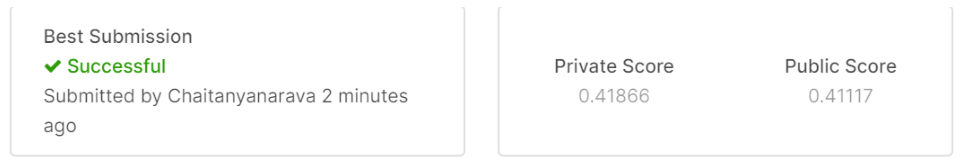

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(17,7))
plt.imshow(mpimg.imread('/content/kaggle_score.PNG'))
plt.axis('off')
plt.show()

**Conclusions:**

**The final Solution to Our problem:**

**Description:**


*   As the main constraint of the given problem statement is to reduce rmsle metric. After training different ML models on the data we find a least RMSLE of 0.44 on cv data.
*   Further applying MLP the rmsle reduced to 0.41 hence the solver of this problem is **MLP**.

**About Model Training:**


*   I tried training the model for 5-10 epochs what i observed from the results is rmsle is going worse. Hence i limited the training to one epoch.And i achieved 0.44 rmsle.
*   After that i fitted the same MLP model three with different batchsizes in the multiples of 2 and the rmsle is reduced to ~0.42.
*   Now I did ensembling on the model that is i trained four similar models and for each datapoint i predicted the price using those models and finally taken the mean out of those predicted prices. 
*   As a result I achieved 0.41 rmsle on the cv data.